In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load the datasets
true_df = pd.read_csv("True.csv", encoding='latin1')
fake_df = pd.read_csv("Fake.csv")

In [3]:
# Add labels
true_df['label'] = 1  
fake_df['label'] = 0 

In [4]:
# Combine datasets
df = pd.concat([true_df, fake_df], axis=0).reset_index(drop=True)

In [5]:
# Drop unnecessary columns if present
df = df[['content', 'label']]

In [6]:
# Convert all content to string and fill NaN with an empty string
df['content'] = df['content'].astype(str).fillna('')

In [7]:
# Text preprocessing
def clean_text(content):
    content = content.lower()
    content = re.sub(r'\d+', '', content)  # Remove numbers
    content = content.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    content = content.strip()
    return content

df['content'] = df['content'].apply(clean_text)

In [8]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['label'], test_size=0.2, random_state=42)

In [9]:
# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [10]:
# Train the model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [11]:
# Predictions
y_pred = model.predict(X_test_tfidf)

In [12]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9972527472527473

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      2001
           1       0.99      1.00      1.00      2003

    accuracy                           1.00      4004
   macro avg       1.00      1.00      1.00      4004
weighted avg       1.00      1.00      1.00      4004


Confusion Matrix:
 [[1990   11]
 [   0 2003]]


In [13]:
# Function to predict new text
def predict_news(news_text):
    cleaned_text = clean_text(news_text)
    transformed_text = vectorizer.transform([cleaned_text])
    prediction = model.predict(transformed_text)
    return "Real News" if prediction[0] == 1 else "Fake News"

In [14]:
# Example Usage
news_sample = "New study shows that eating apples can improve brain function."
print("Prediction:", predict_news(news_sample))

Prediction: Fake News


In [15]:
news_sample = """The World Health Organization (WHO) has announced a new initiative to combat infectious diseases in developing countries. 
The program aims to provide vaccines and medical support to regions affected by recent outbreaks. 
Health experts say this initiative could save millions of lives over the next decade."""
print(predict_news(news_sample))


Fake News


In [16]:
accuracy_score

<function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>

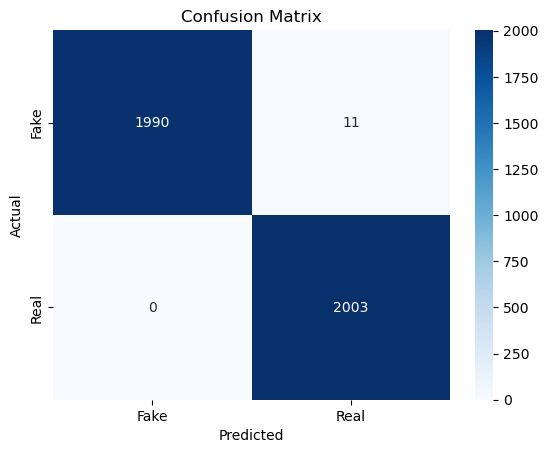

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


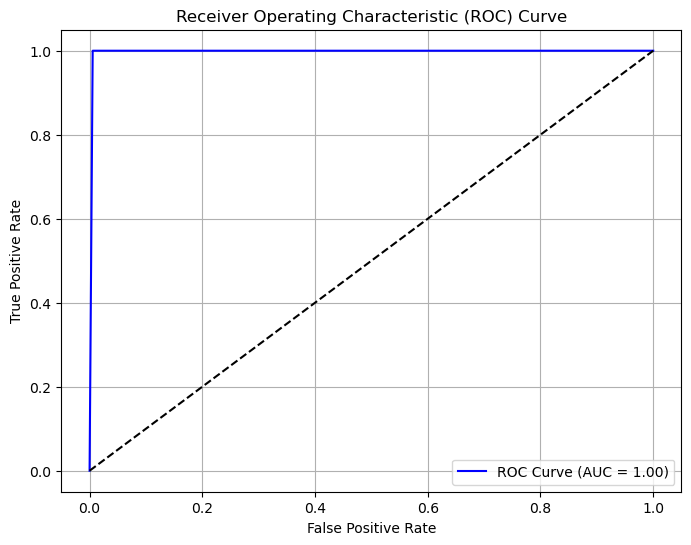

In [30]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


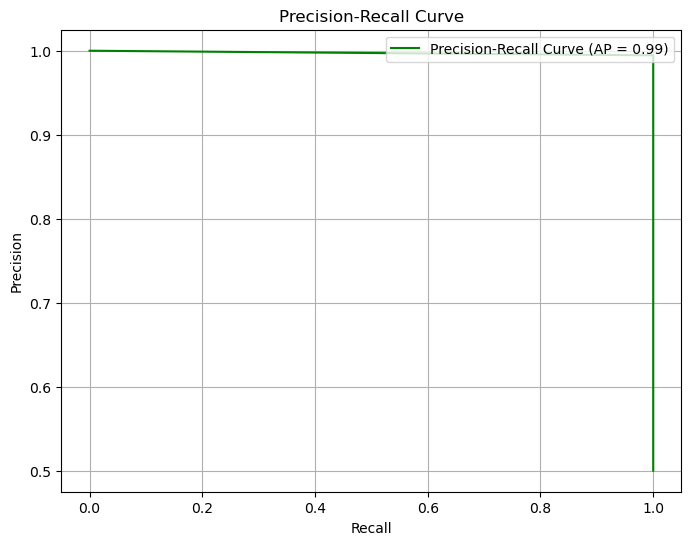

In [31]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"Precision-Recall Curve (AP = {avg_precision:.2f})", color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.grid()
plt.show()
